In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [3]:
df = pd.read_csv("HR.csv")
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low
14999,NaN,0.52,2,158,3,0,1,0,support,low
15000,NaN,999999.00,2,158,3,0,1,0,sale,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [7]:
df.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
df = df.dropna(subset=['satisfaction_level'])

In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
df.duplicated().sum()

3008

In [11]:
df = df.drop_duplicates()
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high
11999,0.50,0.73,4,180,3,0,0,0,IT,low


In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11992.000000,11992.000000,11992.000000,11992.000000,11992.000000,11992.000000,11992.000000,11992.000000
mean,0.629664,0.716656,3.802702,200.469980,3.364743,0.154270,0.166111,0.016928
std,0.241061,0.168360,1.163306,48.727325,1.330242,0.361222,0.372196,0.129007
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


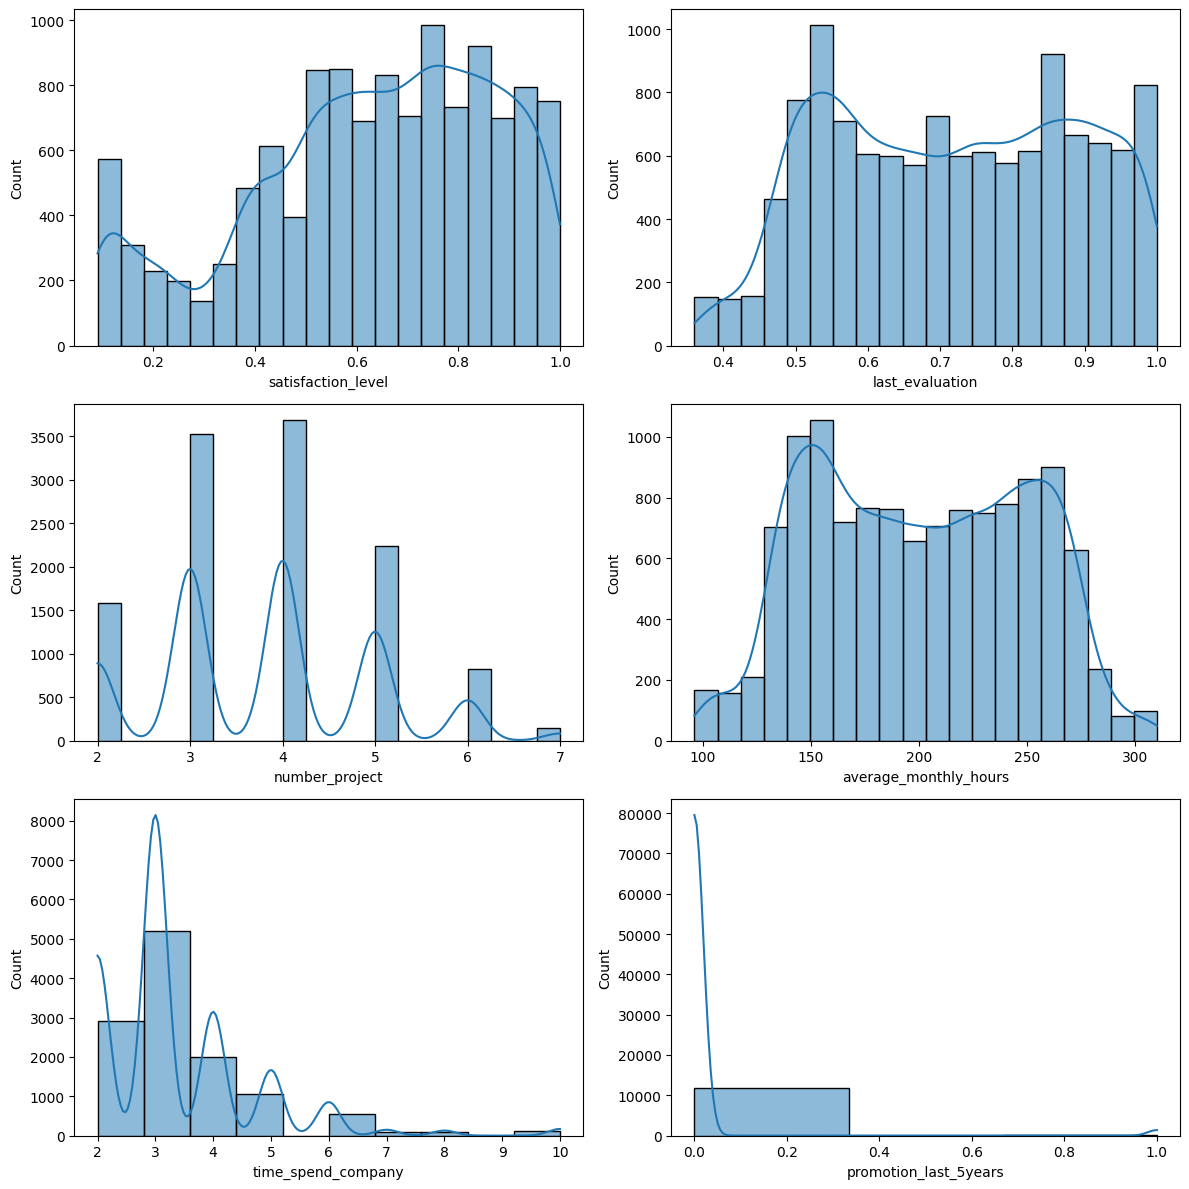

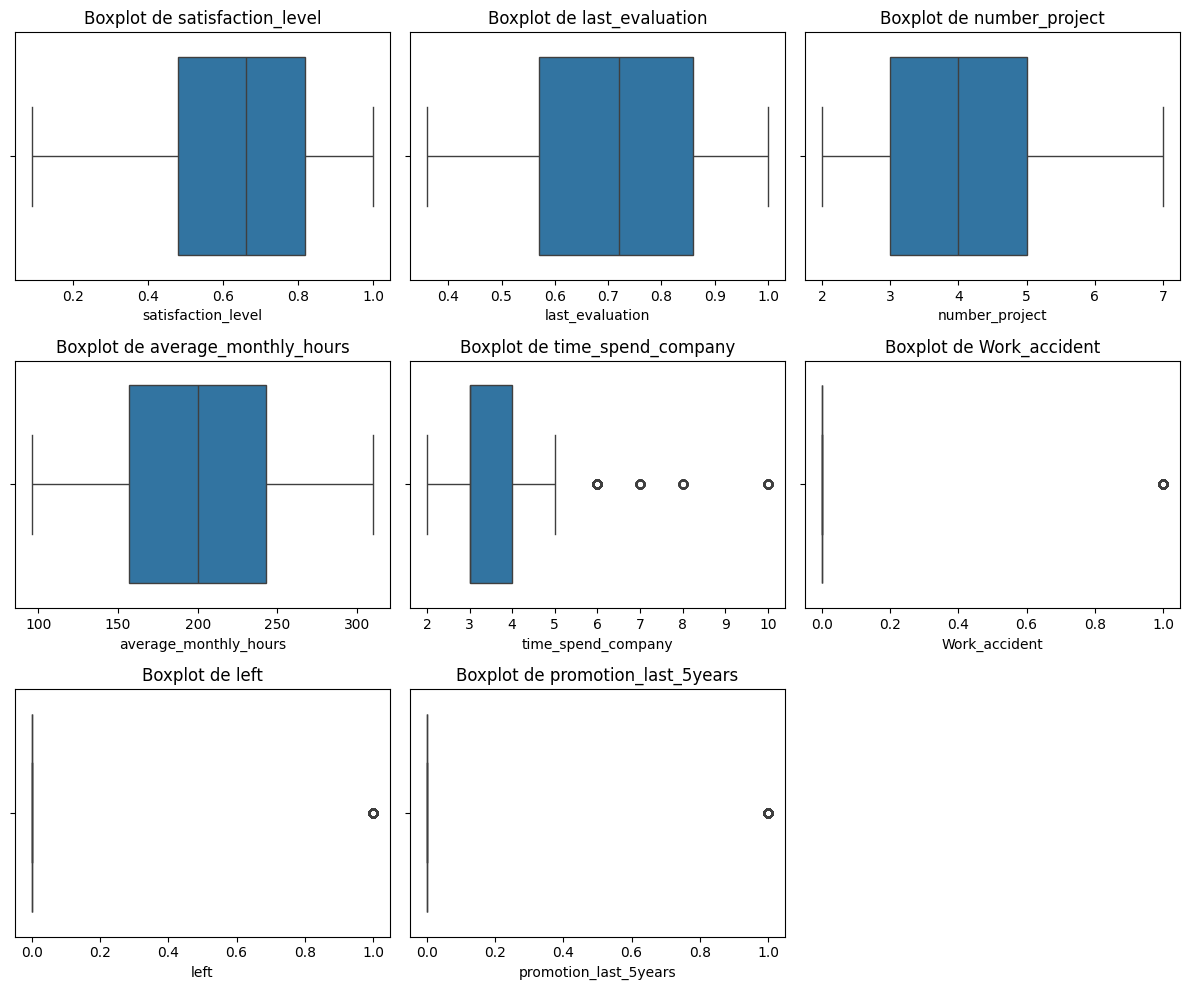

In [13]:
# Análisis exploratorio de los datos (EDA)

# Análisis univariado de variables numéricas

# Histograma para las variables numéricas
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.histplot(df['satisfaction_level'], bins=20, kde=True, ax=axes[0, 0])
sns.histplot(df['last_evaluation'], bins=20, kde=True, ax=axes[0, 1])
sns.histplot(df['number_project'], bins=20, kde=True, ax=axes[1, 0])
sns.histplot(df['average_monthly_hours'], bins=20, kde=True, ax=axes[1, 1])
sns.histplot(df['time_spend_company'], bins=10, kde=True, ax=axes[2, 0])
sns.histplot(df['promotion_last_5years'], bins=3, kde=True, ax=axes[2, 1])
plt.tight_layout()
plt.show()
# Boxplot para cada variable numérica (detectar outliers)
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

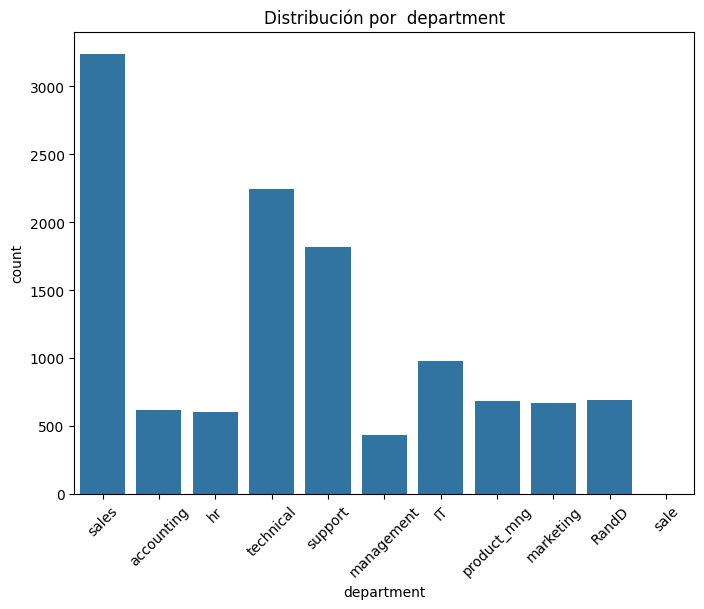

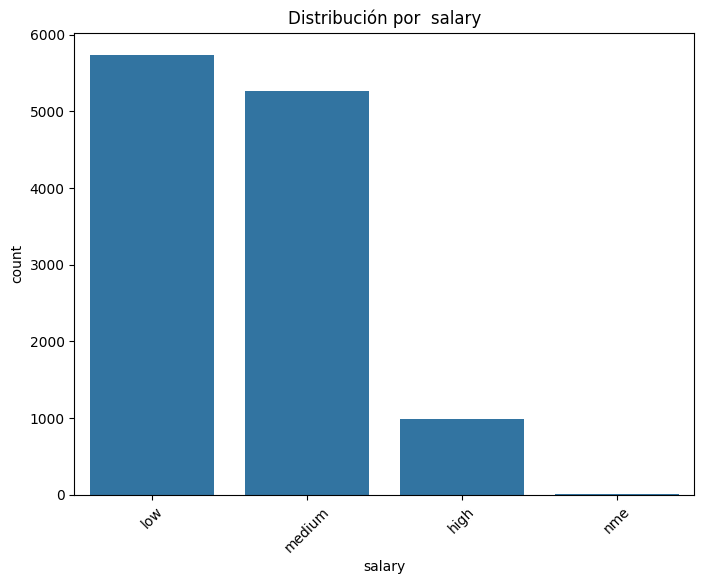

In [14]:
# Análisis univariado de variables categóricas

# Countplot para las variables categóricas
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f"Distribución por  {col}")
    plt.xticks(rotation=45)
    plt.show()

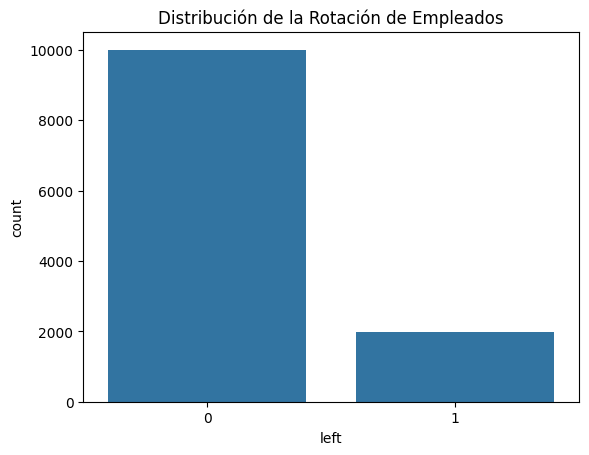

In [15]:
# Distribución de la variable 'left' (rotación de empleados)
sns.countplot(x='left', data=df)
plt.title('Distribución de la Rotación de Empleados')
plt.show()


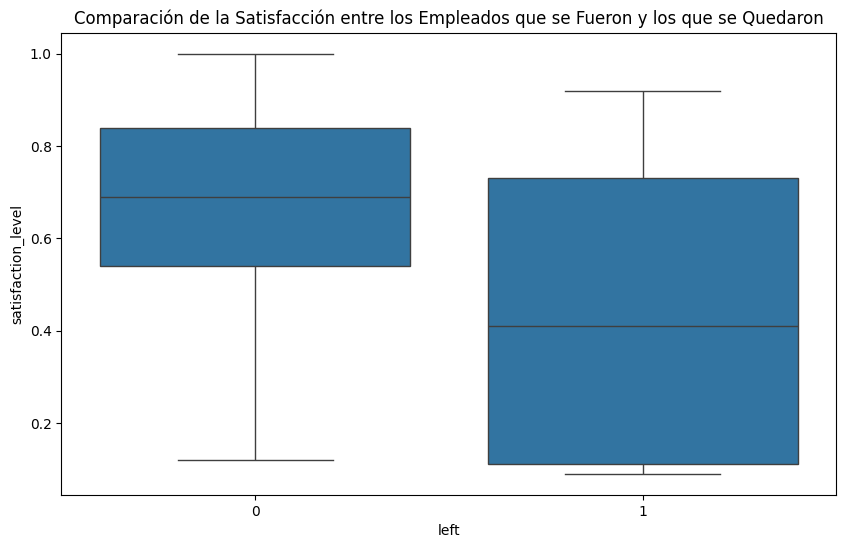

In [16]:
# Comparar la satisfacción entre empleados que se fueron y los que se quedaron
plt.figure(figsize=(10,6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Comparación de la Satisfacción entre los Empleados que se Fueron y los que se Quedaron')
plt.show()


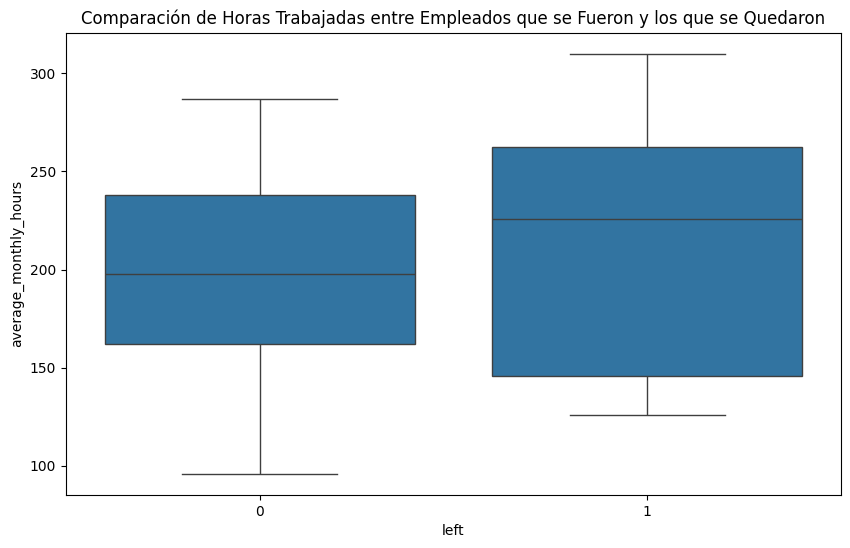

In [17]:
# Comparar las horas trabajadas entre empleados que se fueron y los que se quedaron
plt.figure(figsize=(10,6))
sns.boxplot(x='left', y='average_monthly_hours', data=df)
plt.title('Comparación de Horas Trabajadas entre Empleados que se Fueron y los que se Quedaron')
plt.show()

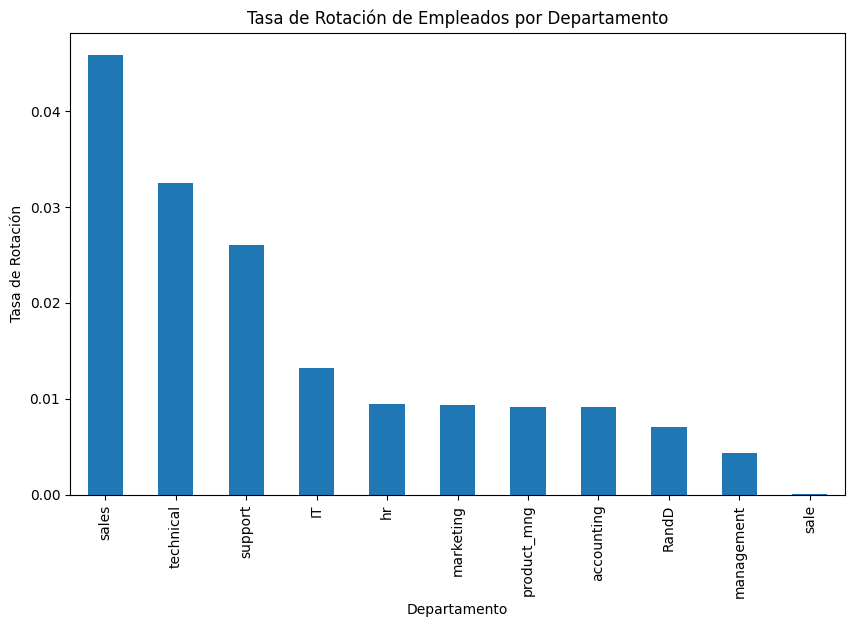

In [18]:
# Crear columnas dummies para cada departamento
department_columns = pd.get_dummies(df['department'])

# Añadir las columnas dummies al DataFrame
df = pd.concat([df, department_columns], axis=1)

# Calcular la tasa de rotación (promedio de 'left') por departamento
rotation_rate = department_columns.apply(lambda x: (x & df['left']).mean(), axis=0).sort_values(ascending=False)

# Visualizar la tasa de rotación por departamento
rotation_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Tasa de Rotación de Empleados por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Tasa de Rotación')
plt.show()

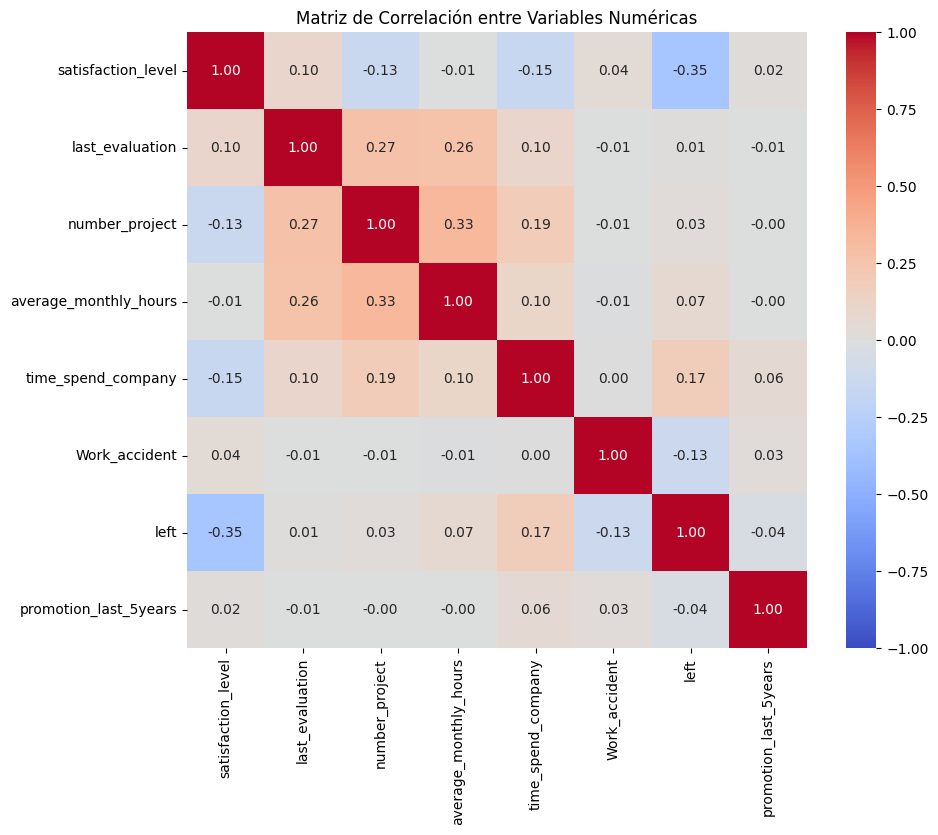

In [19]:
# Análisis bivariado

## Correlación entre variables numéricas
# Seleccionar solo las columnas numéricas (que son de tipo float64 o int64)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la correlación solo entre las variables numéricas
corr = df[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


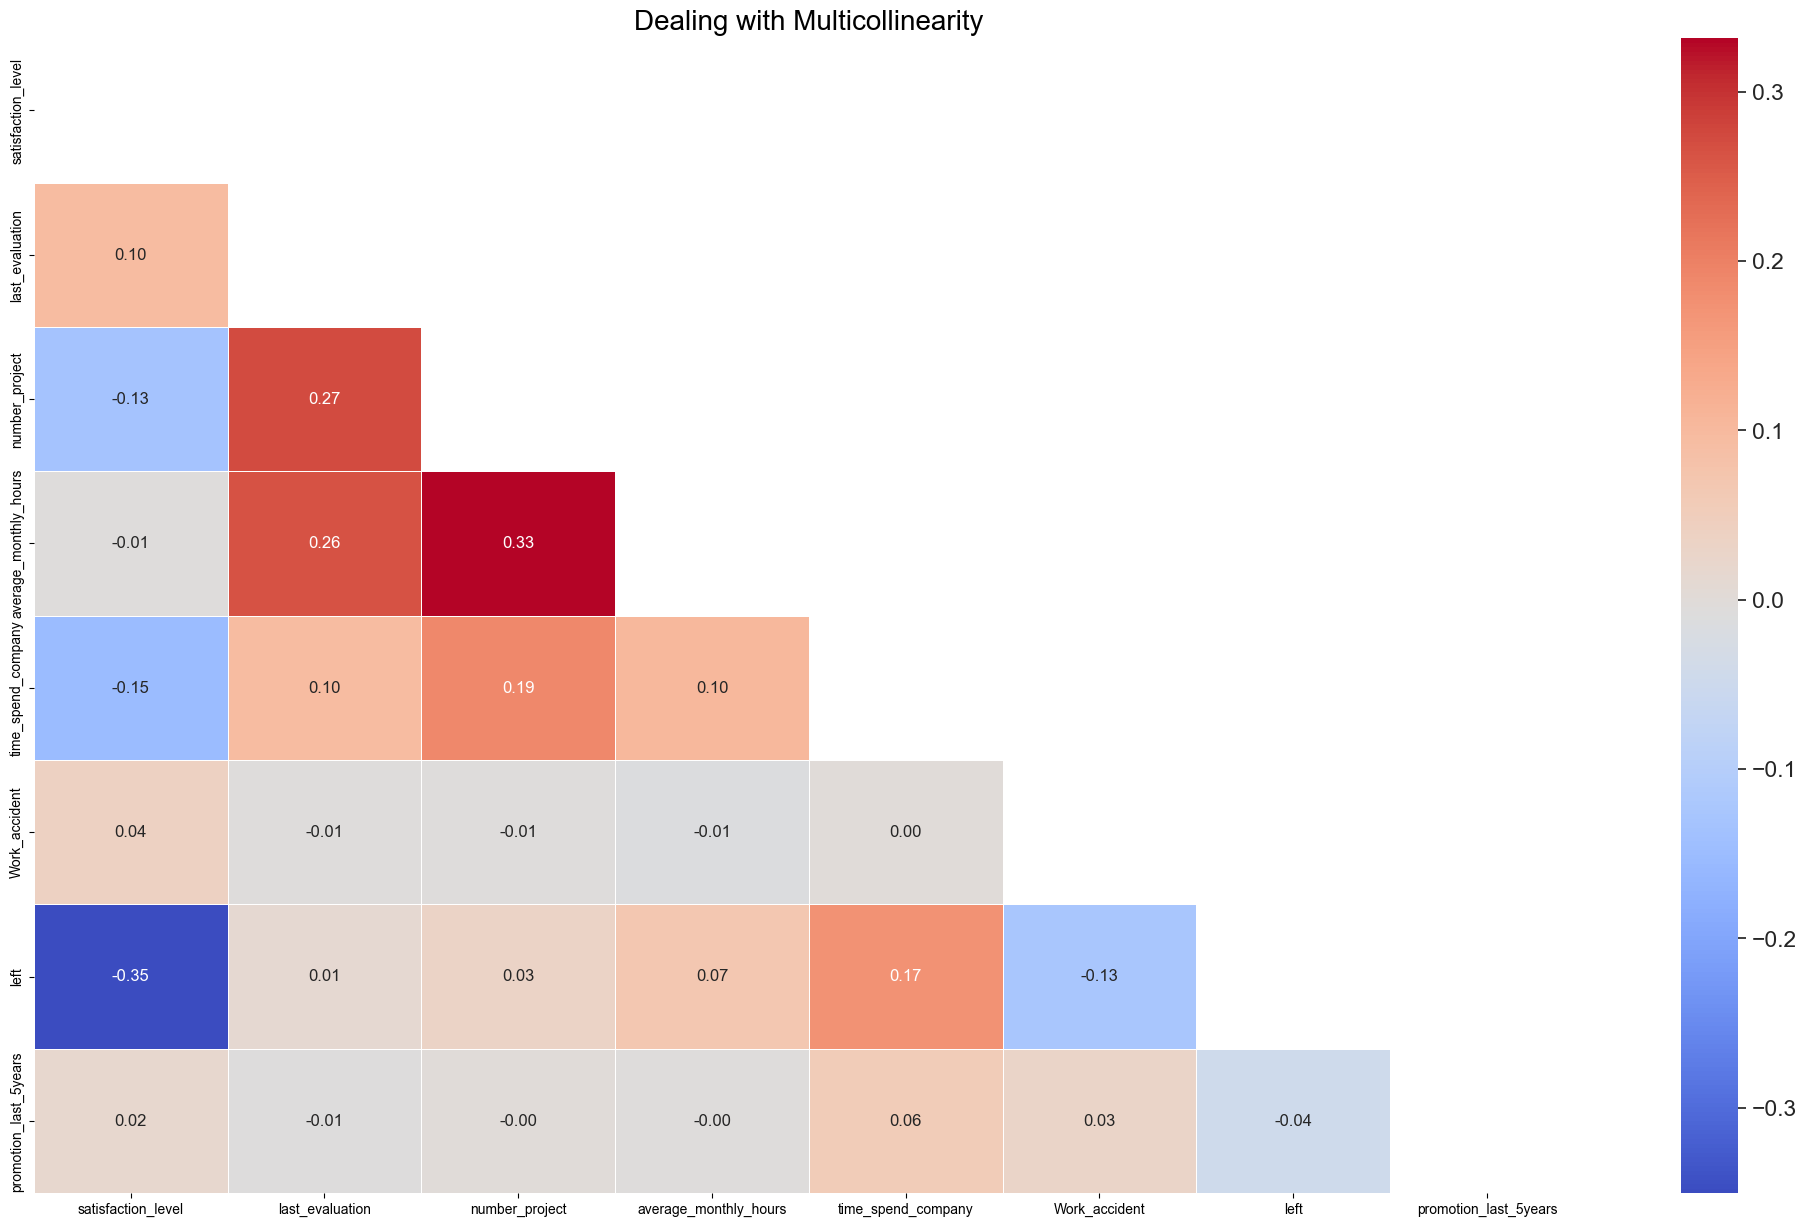

In [20]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

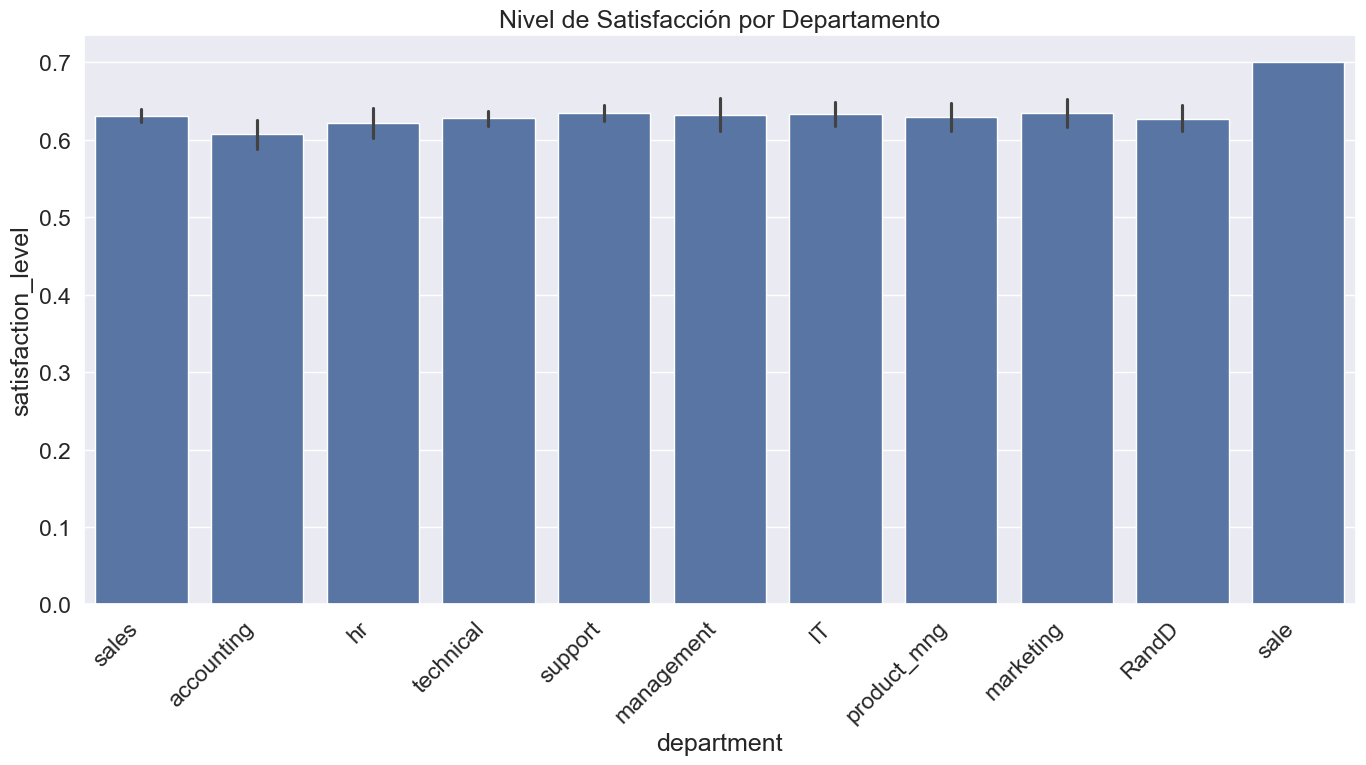

In [21]:
plt.figure(figsize=(14, 8))  
sns.barplot(x='department', y='satisfaction_level', data=df)
plt.title('Nivel de Satisfacción por Departamento')

plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  
plt.show()

In [22]:
correlation = df[['left', 'average_monthly_hours']].corr()
correlation

,left,average_monthly_hours
left,1.000000,0.070229
average_monthly_hours,0.070229,1.000000


C:\Users\hugoe\AppData\Local\Temp\ipykernel_33984\2752098535.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['left'] == 0], x='average_monthly_hours', label='No dejó', shade=True, color='blue')
C:\Users\hugoe\AppData\Local\Temp\ipykernel_33984\2752098535.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['left'] == 1], x='average_monthly_hours', label='Dejó', shade=True, color='red')


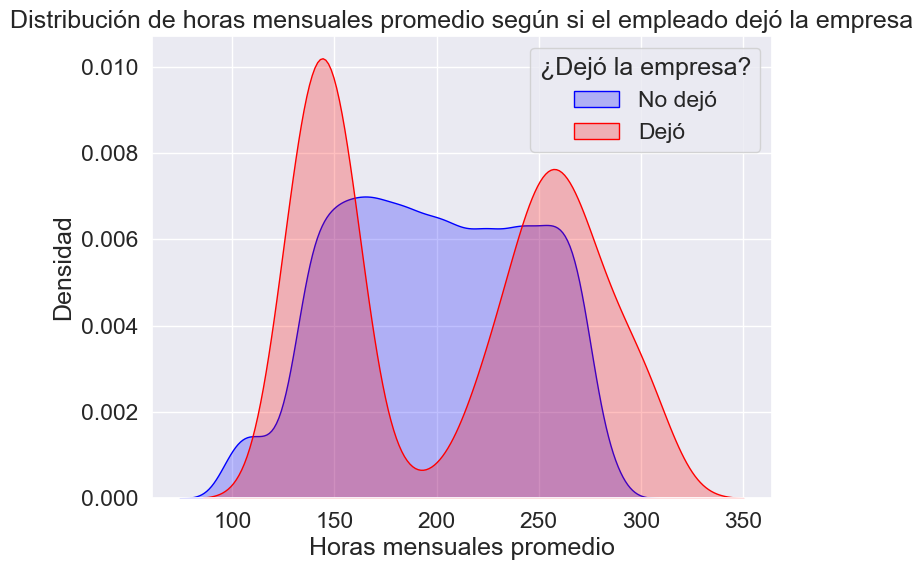

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['left'] == 0], x='average_monthly_hours', label='No dejó', shade=True, color='blue')
sns.kdeplot(data=df[df['left'] == 1], x='average_monthly_hours', label='Dejó', shade=True, color='red')
plt.title('Distribución de horas mensuales promedio según si el empleado dejó la empresa')
plt.xlabel('Horas mensuales promedio')
plt.ylabel('Densidad')
plt.legend(title='¿Dejó la empresa?')
plt.show()

In [24]:
correlation_hours_projects = df[['average_monthly_hours', 'number_project']].corr()
correlation_hours_projects

,average_monthly_hours,number_project
average_monthly_hours,1.000000,0.331585
number_project,0.331585,1.000000


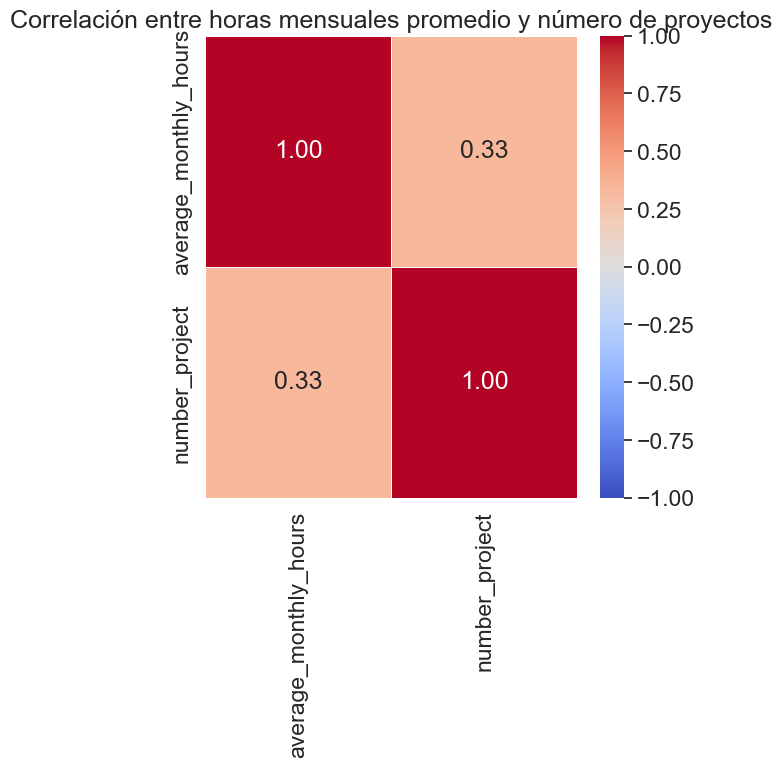

In [25]:
# Calcular la matriz de correlación
corr = df[['average_monthly_hours', 'number_project']].corr()

# Crear el heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlación entre horas mensuales promedio y número de proyectos')
plt.show()

C:\Users\hugoe\AppData\Local\Temp\ipykernel_33984\670493407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='left', y='average_monthly_hours', palette=['blue', 'red'])


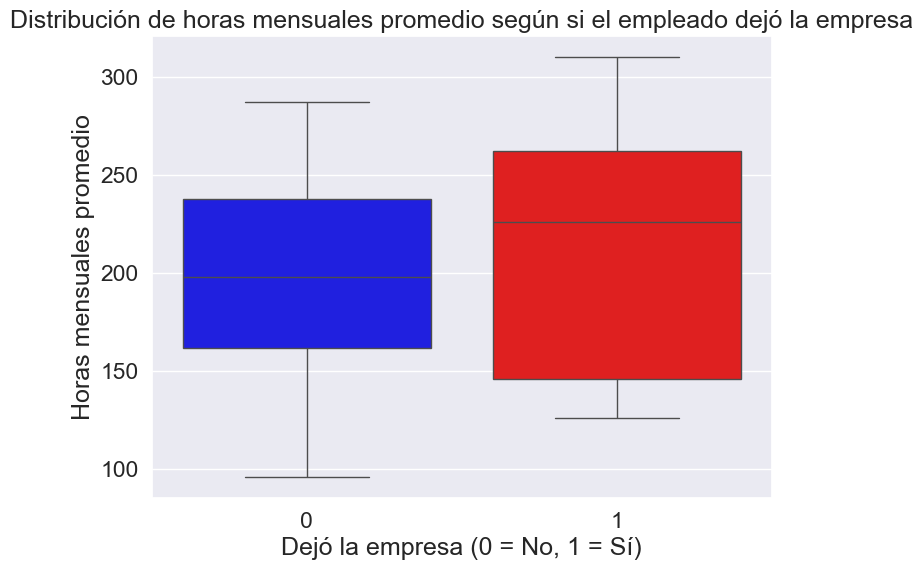

In [26]:
# Boxplot para 'average_monthly_hours' según si dejó la empresa
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='left', y='average_monthly_hours', palette=['blue', 'red'])
plt.title('Distribución de horas mensuales promedio según si el empleado dejó la empresa')
plt.xlabel('Dejó la empresa (0 = No, 1 = Sí)')
plt.ylabel('Horas mensuales promedio')
plt.show()



C:\Users\hugoe\AppData\Local\Temp\ipykernel_33984\1040696113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='left', y='number_project', palette=['blue', 'red'])


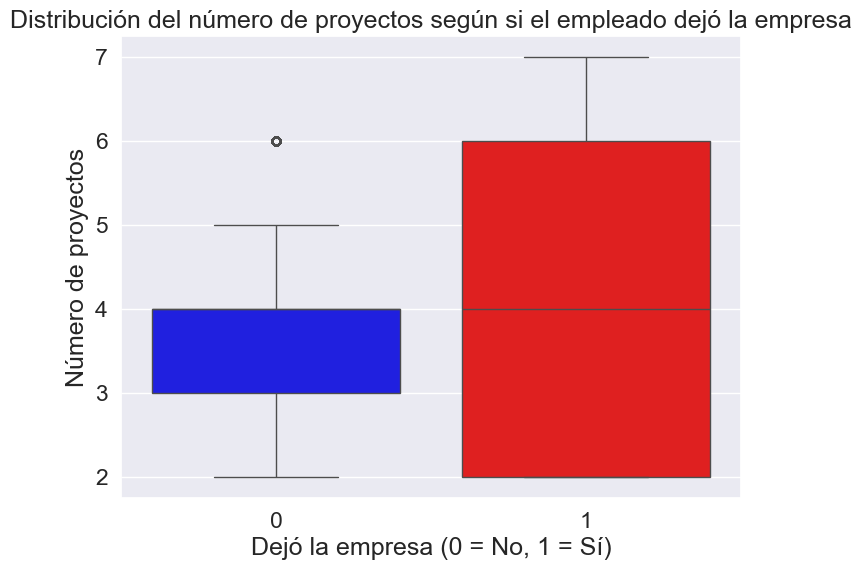

In [27]:
# Boxplot para 'number_project' según si dejó la empresa
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='left', y='number_project', palette=['blue', 'red'])
plt.title('Distribución del número de proyectos según si el empleado dejó la empresa')
plt.xlabel('Dejó la empresa (0 = No, 1 = Sí)')
plt.ylabel('Número de proyectos')
plt.show()

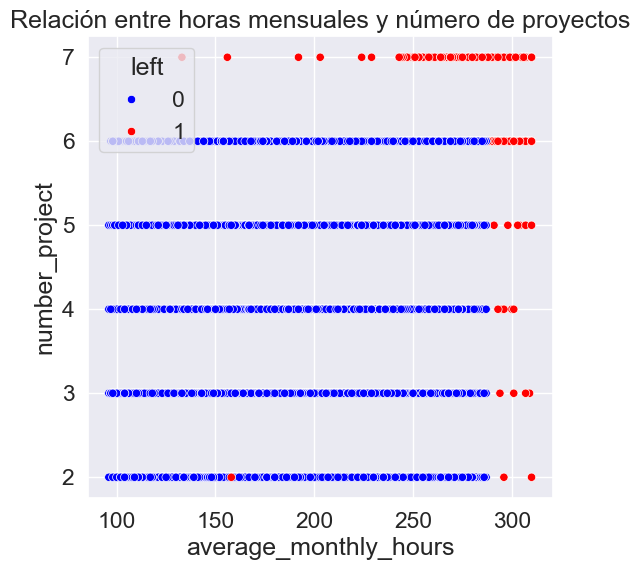

In [28]:
# Relación entre horas mensuales y número de proyectos
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='average_monthly_hours', y='number_project', hue='left', palette=['blue', 'red'])
plt.title('Relación entre horas mensuales y número de proyectos')
plt.show()

C:\Users\hugoe\AppData\Local\Temp\ipykernel_33984\668157274.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='hour_range', y='number_project', hue='left', ci=None, palette=['blue', 'red'])


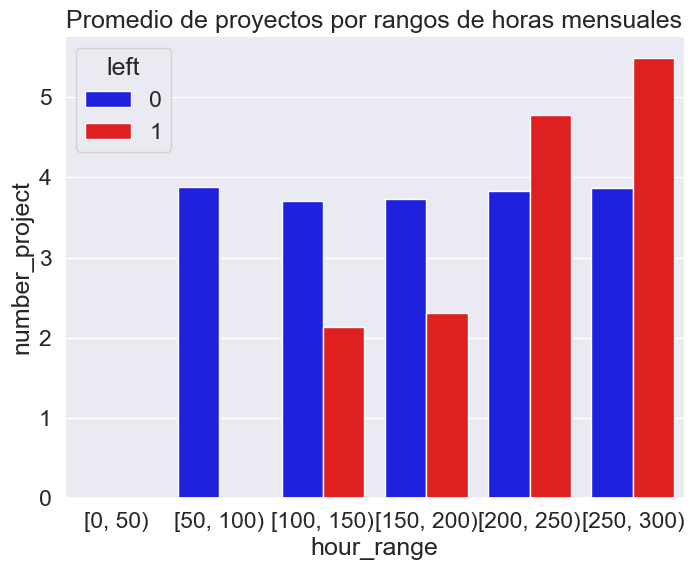

In [29]:
# Relación entre horas mensuales y número de proyectos
df['hour_range'] = pd.cut(df['average_monthly_hours'], bins=range(0, 350, 50), right=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='hour_range', y='number_project', hue='left', ci=None, palette=['blue', 'red'])
plt.title('Promedio de proyectos por rangos de horas mensuales')
plt.show()

In [30]:
df.to_csv('HR_limpio.csv', index=False)